<a href="https://colab.research.google.com/github/vanderbilt-ml/50-shah-mlproj-traffic-accidents/blob/main/TrafficAccidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

#Traffic Accidents

## Background

This is dataset of traffic accidents reported from 2019 to present. The data has been retrieved using manual export and is subject to change during an investigation as more information becomes available.

## Project Description

Each record is a reported traffic accident. Check the metadata field descriptions for more detailed information.

### **Data Dictionary**

Feature	|	Description	|	Type
-------------	|	-------------	|	-------------
Accident Number	|	MNPD incident number for the crash	|	Plain Text
Date and Time	|	Date and time of the accident	|	Date & Time
Number of Motor Vehicles	|	Number of vehicles involved in the accident	|	Number
Number of Injuries	|	Number of people with injuries as a result of the accident	|	Number
Number of Fatalities	|	Number of fatalities as a result of the accident	|	Number
Property Damage	|	Indicates if there was property damage as a result of the accident	|	Checkbox
Hit and Run	|	Indicates if the accident was a hit and run	|	Checkbox
Reporting Officer	|	ID number of the officer responding to the accident	|	Plain Text
Collision Type Code	|	System code for the type of collision	|	Number
Collision Type Description	|	Full text description of the collision type	|	Plain Text
Weather Code	|	System code for the weather conditions at the time of the accident	|	Number
Weather Description	|	Full text description of the weather conditions	|	Plain Text
Illumination Code	|	System code for type of lighting at the time of the accident	|	Number
Illumination Description	|	Full text description of the lighting conditions	|	Plain Text
Harmful Code	|	System code indicating harmful objects or conditions present in the accident	|	Plain Text
Harmful Description	|	Full text description of the harmful objects or conditions	|	Plain Text
Street Address	|	Street address at which the accident occurred	|	Plain Text
City	|	City in which the accident occurred	|	Plain Text
State	|	State in which the accident occurred	|	Plain Text
ZIP	|	ZIP Code in which the accident occurred	|	Number
RPA	|	MNPD reporting zone in which the accident occurred	|	Number
Precinct	|	Assigned MNPD precinct in which the accident occurred	|	Plain Text
Latitude	|	Approximate latitude where the accident occurred	|	Number
Longitude	|	Approximate longitude where the accident occurred	|	Number
Mapped Location	|	Combined latitude and longitude for the accident for mapping purposes	|	Point

In [332]:
#tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context, tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

## Load Data

Load the traffic accidents data provided using pandas and read it as a dataframe. Please note that the The repository is private so I have to use token to access .csv file.

In [333]:
penguins = pd.read_csv('https://raw.githubusercontent.com/vanderbilt-ml/50-shah-mlproj-traffic-accidents/main/Traffic_Accidents.csv')
display(penguins.head())
penguins.info()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20120135824,3/8/2021,2,1,0,False,False,473670.0,11.0,Front to Rear,...,MOTOR VEHICLE IN TRANSPORT,W TRINITY LN & E TRINITY LN,NASHVILLE,TN,37207,1863.0,EAST,36.2059,-86.7688,POINT (-86.7688 36.2059)
1,20190013511,1/7/2020,2,1,0,False,False,235761.0,6.0,SIDESWIPE - OPPOSITE DIRECTION,...,MOTOR VEHICLE IN TRANSPORT,HIGHWAY 70 & NEWSOM STATION RD,NASHVILLE,TN,37221,4713.0,WEST,36.0916,-86.9950,POINT (-86.995 36.0916)
2,20190016232,1/8/2020,2,1,0,False,False,665896.0,4.0,ANGLE,...,MOTOR VEHICLE IN TRANSPORT,US HWY 431 & LUCAS LN,NASHVILLE,TN,37207,1863.0,EAST,36.2061,-86.7717,POINT (-86.7717 36.2061)
3,20190020194,1/9/2020,3,1,0,False,False,580819.0,11.0,Front to Rear,...,MOTOR VEHICLE IN TRANSPORT,BROADWAY & 10TH AVN,NASHVILLE,TN,37203,4077.0,CENTRA,36.1578,-86.7846,POINT (-86.7846 36.1578)
4,20200000064,1/1/2020,1,1,0,False,False,299248.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,PEDESTRIAN,MURFREESBORO PKE & MCGAVOCK PKE,NASHVILLE,TN,37217,8841.0,SOUTH,36.1129,-86.6890,POINT (-86.689 36.1129)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47668 entries, 0 to 47667
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Accident Number             47668 non-null  int64  
 1   Date and Time               47668 non-null  object 
 2   Number of Motor Vehicles    47668 non-null  int64  
 3   Number of Injuries          47668 non-null  int64  
 4   Number of Fatalities        47668 non-null  int64  
 5   Property Damage             47668 non-null  bool   
 6   Hit and Run                 47668 non-null  bool   
 7   Reporting Officer           47667 non-null  float64
 8   Collision Type Code         47666 non-null  float64
 9   Collision Type Description  47668 non-null  object 
 10  Weather Code                42639 non-null  float64
 11  Weather Description         47668 non-null  object 
 12  Illumination Code           47575 non-null  float64
 13  Illumination Description    476

### Data Cleaning
Detect and Remove Missing values

After exploring and observing the data, there are a few columns with the coded value for which the description is already available. I am removing data values out of the dataframe.

The columns are specified below:

**Date and Time**, **Reporting Officer**, **Collision Type Code**, **Weather Code**, **Illumination Code**, **Harmful Code**, **RPA**

In [334]:
penguins = penguins.drop(columns=['Reporting Officer', 'Collision Type Code', 'Weather Code', 'Illumination Code', 'Harmful Code', 'RPA'])
print(penguins.columns)

Index(['Accident Number', 'Date and Time', 'Number of Motor Vehicles',
       'Number of Injuries', 'Number of Fatalities', 'Property Damage',
       'Hit and Run', 'Collision Type Description', 'Weather Description',
       'Illumination Description', 'Harmful Description', 'Street Address',
       'City', 'State', 'ZIP', 'Precinct', 'Latitude', 'Longitude',
       'Mapped Location'],
      dtype='object')


In [335]:
penguins.isnull().sum()

Accident Number               0
Date and Time                 0
Number of Motor Vehicles      0
Number of Injuries            0
Number of Fatalities          0
Property Damage               0
Hit and Run                   0
Collision Type Description    0
Weather Description           0
Illumination Description      0
Harmful Description           0
Street Address                0
City                          0
State                         0
ZIP                           0
Precinct                      0
Latitude                      0
Longitude                     0
Mapped Location               0
dtype: int64

## Feature Engineering

There are many feature engineering techniques including e.g. Imputation, Handling Outliers, Binning, Log Transform, One-Hot Encoding, Grouping Operations, Feature Split, Scaling etc. 

We will be applying lesson learned from various assignments lets create some statistics on the  data attached here. Also create the test and train set, pipeline and check/learn the outcome of the data.

In [336]:
penguins.shape
penguins.head()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Harmful Description,Street Address,City,State,ZIP,Precinct,Latitude,Longitude,Mapped Location
0,20120135824,3/8/2021,2,1,0,False,False,Front to Rear,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,W TRINITY LN & E TRINITY LN,NASHVILLE,TN,37207,EAST,36.2059,-86.7688,POINT (-86.7688 36.2059)
1,20190013511,1/7/2020,2,1,0,False,False,SIDESWIPE - OPPOSITE DIRECTION,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,HIGHWAY 70 & NEWSOM STATION RD,NASHVILLE,TN,37221,WEST,36.0916,-86.9950,POINT (-86.995 36.0916)
2,20190016232,1/8/2020,2,1,0,False,False,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,US HWY 431 & LUCAS LN,NASHVILLE,TN,37207,EAST,36.2061,-86.7717,POINT (-86.7717 36.2061)
3,20190020194,1/9/2020,3,1,0,False,False,Front to Rear,CLEAR,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,BROADWAY & 10TH AVN,NASHVILLE,TN,37203,CENTRA,36.1578,-86.7846,POINT (-86.7846 36.1578)
4,20200000064,1/1/2020,1,1,0,False,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DARK - LIGHTED,PEDESTRIAN,MURFREESBORO PKE & MCGAVOCK PKE,NASHVILLE,TN,37217,SOUTH,36.1129,-86.6890,POINT (-86.689 36.1129)


**Total Number of accidents based on Collission Type**

In [337]:
penguins["Collision Type Description"].unique()

array(['Front to Rear', 'SIDESWIPE - OPPOSITE DIRECTION', 'ANGLE',
       'NOT COLLISION W/MOTOR VEHICLE-TRANSPORT', 'OTHER',
       'SIDESWIPE - SAME DIRECTION', 'UNKNOWN', 'HEAD-ON', 'Rear to Side',
       'REAR-TO-REAR', 'Unknown'], dtype=object)

In [339]:
collision_types = penguins["Collision Type Description"].unique()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


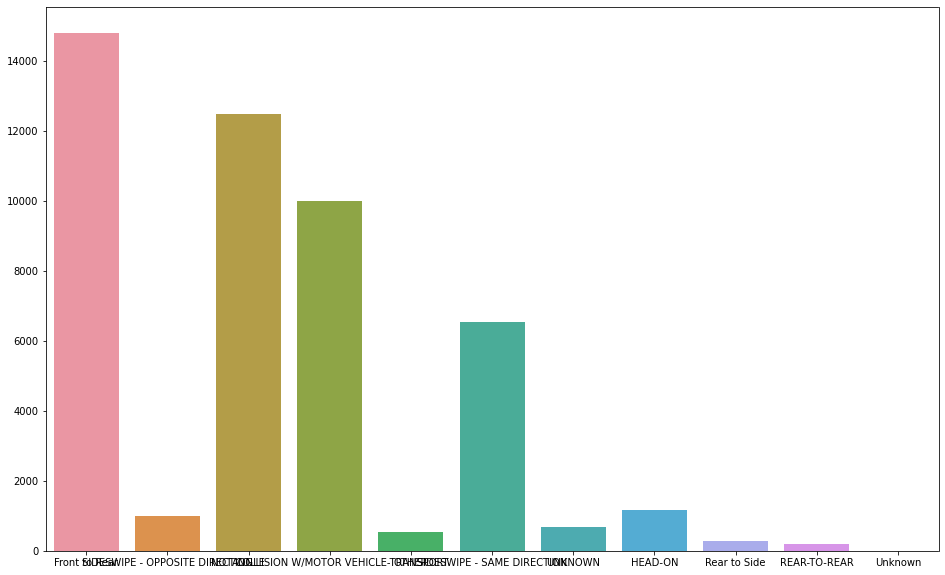

In [340]:
counts_by_collision_type=[]
for i in penguins["Collision Type Description"].unique(): counts_by_collision_type.append(penguins[penguins['Collision Type Description']==i].count()['Accident Number'])

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(collision_types, counts_by_collision_type)

**Total Number of accidents based on Weather Condition**

In [341]:
penguins["Weather Description"].unique()

array(['CLEAR', 'CLOUDY', 'RAIN', 'UNKNOWN', 'FOG', 'Unknown',
       'SEVERE CROSSWIND', 'SNOW', 'BLOWING SNOW', 'OTHER (NARRATIVE)',
       'SLEET, HAIL', 'SMOG, SMOKE'], dtype=object)

In [342]:
weather_conditions = penguins["Weather Description"].unique()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


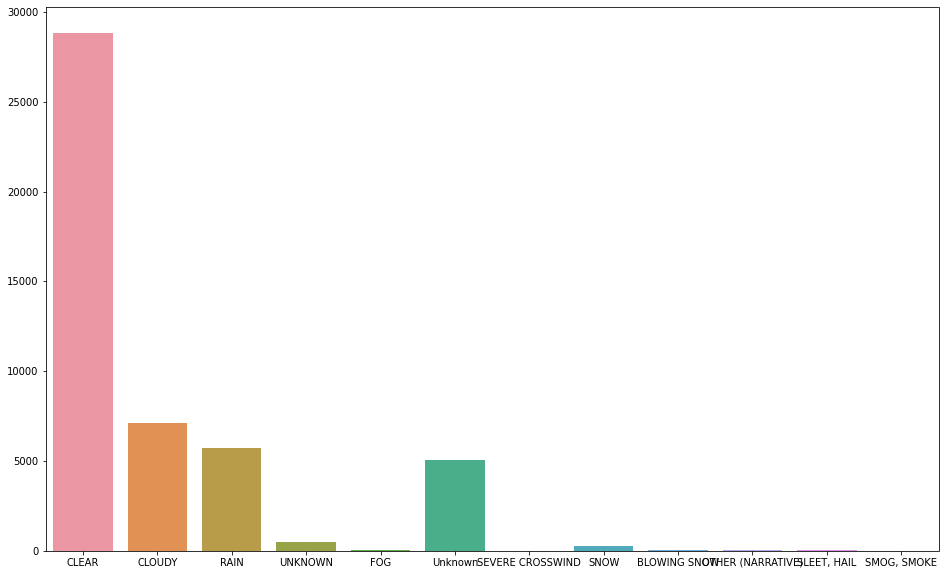

In [343]:
counts_by_weather_condition=[]
for i in penguins["Weather Description"].unique(): counts_by_weather_condition.append(penguins[penguins['Weather Description']==i].count()['Accident Number'])

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(weather_conditions, counts_by_weather_condition)

**Total Number of accidents by Day Of Week**

In [344]:
accident_DOW = pd.to_datetime(penguins["Date and Time"]).dt.day_name().unique()

In [345]:
print(accident_DOW)

['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


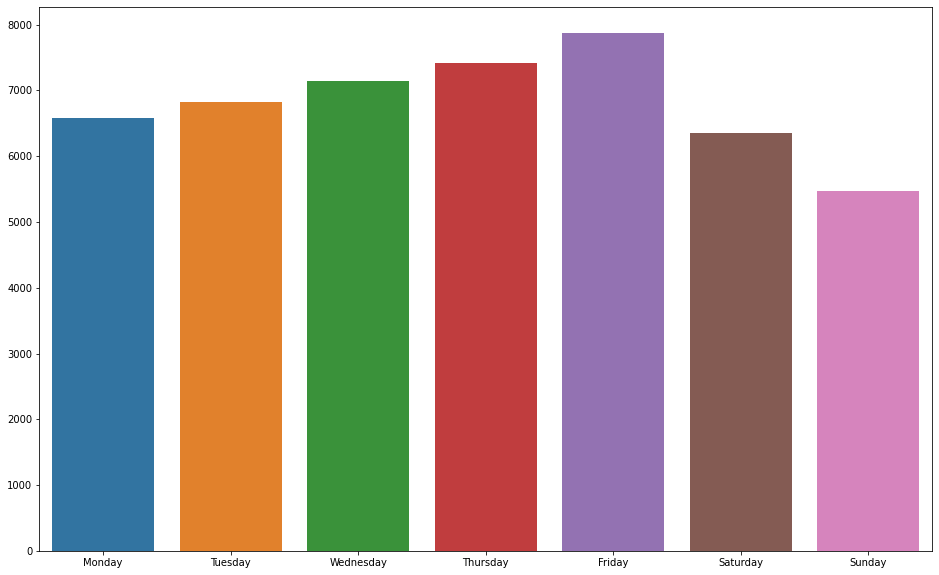

In [346]:
counts_by_DOW=[]
for i in pd.to_datetime(penguins["Date and Time"]).dt.day_name().unique(): counts_by_DOW.append(penguins[pd.to_datetime(penguins["Date and Time"]).dt.day_name()==i].count()['Accident Number'])

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(accident_DOW, counts_by_DOW)

**Build Test and Train Set**

In [347]:
class_column = 'Hit and Run'
random_seed = 2435

X_train, X_test, Y_train, Y_test = train_test_split(penguins.drop(columns=class_column), penguins[class_column],
                                                   test_size=0.25, random_state=random_seed, stratify=penguins[class_column])

In [348]:
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (35751, 18)


,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Collision Type Description,Weather Description,Illumination Description,Harmful Description,Street Address,City,State,ZIP,Precinct,Latitude,Longitude,Mapped Location
46868,20220253361,5/23/2022,0,1,0,False,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,GALLATIN PKEN & OLD TIME VILLAGE PVTDR,MADISON,TN,37115,MADISO,36.2638,-86.7117,POINT (-86.7117 36.2638)
30562,20210371200,7/9/2021,2,0,0,True,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT;MAIL BOX,FOREST PARK RD & E OLD HICKORY BLVD,MADISON,TN,37115,MADISO,36.2629,-86.7034,POINT (-86.7034 36.2629)
26670,20210231437,4/25/2021,2,0,0,False,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,ZELIDA AV & BELL RD,ANTIOCH,TN,37013,SOUTH,36.0549,-86.6425,POINT (-86.6425 36.0549)
42967,20220104877,3/7/2022,0,0,0,False,Front to Rear,RAIN,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,WEDGEWOOD AV & I65 N ENT RAMP,NASHVILLE,TN,37204,MIDTOW,36.1343,-86.7747,POINT (-86.7747 36.1343)
46649,20220246910,5/19/2022,0,0,0,False,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,NOLENSVILLE PKE & ROSEDALE AV,NASHVILLE,TN,37211,MIDTOW,36.1250,-86.7522,POINT (-86.7522 36.125)



On X test: 
X test dimensions:  (11917, 18)


,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Collision Type Description,Weather Description,Illumination Description,Harmful Description,Street Address,City,State,ZIP,Precinct,Latitude,Longitude,Mapped Location
36801,20210570151,11/3/2021,2,0,0,False,Front to Rear,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,I440 ENT RAMP & I 65,NASHVILLE,TN,37204,MIDTOW,36.1117,-86.7713,POINT (-86.7713 36.1117)
9197,20200333966,5/11/2020,2,0,0,False,SIDESWIPE - SAME DIRECTION,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,MM 86 0 I 65,NASHVILLE,TN,37208,CENTRA,36.1916,-86.7859,POINT (-86.7859 36.1916)
8047,20200270853,4/16/2020,2,0,0,False,Front to Rear,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,MURFREESBORO PKE & HOBSON PKE,ANTIOCH,TN,37013,SOUTH,36.0430,-86.6066,POINT (-86.6066 36.043)
38136,20210605919,11/26/2021,2,0,0,False,SIDESWIPE - SAME DIRECTION,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,CONFERENCE DR & RIVERGATE MALL PVTDR,GOODLETTSVILLE,TN,37072,MADISO,36.3055,-86.6936,POINT (-86.6936 36.3055)
25403,20210180871,3/30/2021,1,1,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,Unknown,LAWRENCE ST & 14TH ST,OLD HICKORY,TN,37138,HERMIT,36.2564,-86.6472,POINT (-86.6472 36.2564)


In [349]:
# Y Train
print('On y train: ')
print('y train dimensions: ', Y_train.shape)
display(Y_train.head())

# Y test
print('\nOn y test: ')
print('y test dimensions: ', Y_test.shape)
display(Y_test.head())

On y train: 
y train dimensions:  (35751,)


46868     True
30562     True
26670    False
42967    False
46649    False
Name: Hit and Run, dtype: bool


On y test: 
y test dimensions:  (11917,)


36801    False
9197      True
8047     False
38136    False
25403     True
Name: Hit and Run, dtype: bool

### Training pipeline

Establish the training pipeline for model and repeat several times as needed The pipeline can also change depending on the data types of the columns in the dataset.

In [350]:
#individual pipelines for differing datatypes
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                               ('onehot_cat', OneHotEncoder(drop='if_binary'))])
num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(missing_values=np.nan, strategy='mean')),
                               ('scale_num', StandardScaler())])

In [351]:
#establish preprocessing pipeline by columns
preproc = ColumnTransformer([('cat_pipe', cat_pipeline, make_column_selector(dtype_include=object)),
                             ('num_pipe', num_pipeline, make_column_selector(dtype_include=np.number))],
                             remainder='passthrough')

### Logistic Regression

In [352]:
#generate the whole modeling pipeline with preprocessing
pipe_lg = Pipeline(steps=[('preproc', preproc), ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

#visualization for steps
with config_context(display='diagram'): display(pipe_lg)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff6714822d0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff671482090>)])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

### Random Forest Classifier

In [353]:
pipe_rf = Pipeline([('preproc', preproc), ('rf', RandomForestClassifier())])

# Feel free to uncomment and edit the code below to visualize your overall pipeline
with config_context(display='diagram'): display(pipe_rf)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff6714822d0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff671482090>)])),
                ('rf', RandomForestClassifier())])

### Gradient Boosting Classifier

In [354]:
pipe_gb = Pipeline(steps=[('preproc', preproc), ('gbc', GradientBoostingClassifier())])


# Feel free to uncomment and edit the code below to visualize your overall pipeline
with config_context(display='diagram'): display(pipe_gb)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff6714822d0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff671482090>)])),
                ('gbc', GradientBoostingClassifier())])

## Cross-validation with hyperparameter tuning

Now that we have our pipelines, we can now use this as part of cross validation and hyperparameter tuning.

### Logistic Regression

In [355]:
tuning_grid_lg = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }
grid_search_lg = GridSearchCV(pipe_lg, param_grid = tuning_grid_lg, cv = 5, return_train_score=True)

In [356]:
tuning_grid_lg

{'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
 'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])}

In [ ]:
grid_search_lg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py", line 753, in transform
    column_as_strings=fit_dataframe_and_transfor

## Performance metrics

If successfull, the project will idenfiy following features:

*   Break down number of accidents by type of collision type and weather conditions. 
*   Accident frequency by day of week

By reviewing the metrics below one can also identify, when do accidents occur most frequently.